### 추천서비스 로직 만들기

(임시)


일단 데이터 프레임으로 존재한다면.  데이터가 완성되기 전까지 

주식의 종가 = 암호화폐 종가

주식의 거례량 = SNS 감정지수

(각코인별)



날짜 - 시세, 감정지수()

### 구상 지표 만들기
- 필요 정보
날짜별 - 시세, 감정지수()

- 추천기준이되는 정보

개인의 투자 기간 n = 예)1주/1달/3달/6달  <--- 주식과 달리 7일,   n= 7,30,90,180

주기는 2*n 로 평균이동선 측정. 왜냐면 저점에서 고점에 판다라고 생각(주기의 반)  그누구도 고점에사서 고점에 팔지 않기 때문

함수가 필요한 평균이동선 = 2*n

**감정지수 마찬가지

- 결국 이동평균선에 따라 z밸류를 각각 구하고 그 평균을 저장


### 구상-지표로 분류 순번 지정
z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 
- 이 값들을 새로운 하나의 테이블로 구성시킨다.
- 순위를 부여한다.

### 구상-순번 지정값에 의거해서 추천 로직, 아웃풋 까지

- 순위에따라 가상의 순서를 부여받은 것을 추천로직의 인풋에따라 함수를 지나 점수를 받는다.
- 함수는 우상,중앙 볼록한,우하
- 최종적으로 최고의 점수를 갖는 암호화패(주식을) 분류 할수 있다.
- 그리고 그 것을 아웃풋한다.

### 추천 로직 - 함수
-함수는 위로 뽀족한 절대값 함수
-고객이 원하는 지점이 가장 높게 만든다 인풋에 의해 변할 수 있게

## I. 패키지 밎 자료 불러오기

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator

### 1) 나중에 데이터베이스 커리해서 가져오기

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'

-rw------- 1 root root 165058 Nov  8 06:32 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'


In [97]:
AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/AAPL.csv')
BABA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/BABA.csv',encoding='cp949')
C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv', encoding='cp949')
INTC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/INTC.csv', encoding='cp949')
MSFT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/MSFT.csv')
# TSLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/TSLA.csv')
UGL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/UGL.csv', encoding='cp949')
WFC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/WFC.csv', encoding='cp949')

In [98]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883"
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616"
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534"
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987"
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258"


### 2) 변수 정의

In [99]:
#n = 개인의 1회 투자 기간
#stocks = 주식(암호화폐)의 종류
#bounds = 참조해야할 범위 <- 질문: 최근 몃달(혹은년) 범위의 통계를 보시겠습니까?
n = [7,30,90,180]
stocks = [AAPL,BABA,C,INTC,MSFT,UGL,WFC]
stocks_name = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']
bounds = [7,30,180,360,720]

## -------------여기까지 DB 데이터 불러오기

## II. 이동평균선 작업

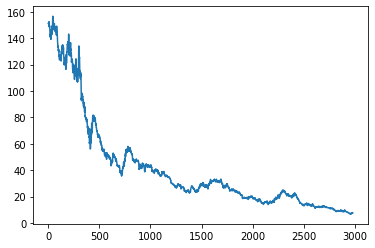

In [100]:
plt.plot(AAPL['종가'])
plt.show()

#그래프는 우리가 보는거에 좌우 반전이나 현 시점에서 그렇게 중요하지 않음

### 1) 이동평균선 코드 만들기

In [101]:
# AAPL['이동평균7일']= AAPL['종가'].rolling(window=7).mean().shift(-6)
#shift없이 사용하면 위로 부터 아래로 더해 7일차 아래옆에 값이 사용되 다시 7일 위로 올려주어야 한다.

# AAPL.head(10)

In [102]:
# AAPL.tail(10)

### 2) 모든 n에 대하여

In [103]:
# for i in n :
#   AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))

In [104]:
# AAPL
# 검산 완료

### 3) 모든 주식에 대하여

In [105]:
for j in stocks :
  for i in n:
    j['이동평균{0}일'.format(i)]= j['종가'].rolling(window=i).mean().shift(-(i-1))

In [106]:
# # 일단 수작업으로 진행(나중에 알아보기)
# # stocks = ['AAPL','BABA','C','INTC','MSFT','TSLA','UGL','WFC']
# for i in n :
#   AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   BABA['이동평균{0}일'.format(i)]= BABA['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   C['이동평균{0}일'.format(i)]= C['종가'].rolling(window=i).mean().shift(-(i-1))  
# for i in n :
#   INTC['이동평균{0}일'.format(i)]= INTC['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   MSFT['이동평균{0}일'.format(i)]= MSFT['종가'].rolling(window=i).mean().shift(-(i-1))
# # for i in n :
#   # TSLA['이동평균{0}일'.format(i)]= TSLA['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   UGL['이동평균{0}일'.format(i)]= UGL['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   WFC['이동평균{0}일'.format(i)]= WFC['종가'].rolling(window=i).mean().shift(-(i-1))


In [107]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일자        2983 non-null   int64  
 1   시가        2983 non-null   float64
 2   고가        2983 non-null   float64
 3   저가        2983 non-null   float64
 4   종가        2983 non-null   float64
 5   BB_상한선    2919 non-null   float64
 6   거래량       2983 non-null   object 
 7   이동평균7일    2977 non-null   float64
 8   이동평균30일   2954 non-null   float64
 9   이동평균90일   2894 non-null   float64
 10  이동평균180일  2804 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 256.5+ KB


## III.표준편차,Z밸류 작업

### 1)표준편차, z밸류 코드 만들기

In [108]:
# AAPL['이동평균7일표준편차']= AAPL['종가'].rolling(window=7).std().shift(-6)

In [109]:
# AAPL.head(8)
# 검산 완료

In [110]:
# AAPL['이동평균7일z밸류'] = (AAPL['종가']-AAPL['이동평균7일'])/(AAPL['이동평균7일표준편차'])

In [111]:
# AAPL.head()

### 2) 모든 n에 대하여

In [112]:
# for i in n :
#   AAPL['이동평균{0}일표준편차'.format(i)]= AAPL['종가'].rolling(window=i).std().shift(-(i-1))
# for i in n :
#   AAPL['이동평균{0}일z밸류'.format(i)] = (AAPL['종가']-AAPL['이동평균{0}일'.format(i)])/(AAPL['이동평균{0}일표준편차'.format(i)])

In [113]:
# AAPL.head()
# 검산 완료

### 3) 모든 주식에 대하여

In [114]:
for j in stocks:
  for i in n :
    j['이동평균{0}일표준편차'.format(i)]= j['종가'].rolling(window=i).std().shift(-(i-1))
  for i in n :
    j['이동평균{0}일z밸류'.format(i)] = (j['종가']-j['이동평균{0}일'.format(i)])/(j['이동평균{0}일표준편차'.format(i)])

In [115]:
BABA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일자            1798 non-null   int64  
 1   시가            1798 non-null   float64
 2   고가            1798 non-null   float64
 3   저가            1798 non-null   float64
 4   종가            1798 non-null   float64
 5   BB_상한선        1734 non-null   float64
 6   거래량           1798 non-null   object 
 7   이동평균7일        1792 non-null   float64
 8   이동평균30일       1769 non-null   float64
 9   이동평균90일       1709 non-null   float64
 10  이동평균180일      1619 non-null   float64
 11  이동평균7일표준편차    1792 non-null   float64
 12  이동평균30일표준편차   1769 non-null   float64
 13  이동평균90일표준편차   1709 non-null   float64
 14  이동평균180일표준편차  1619 non-null   float64
 15  이동평균7일z밸류     1792 non-null   float64
 16  이동평균30일z밸류    1769 non-null   float64
 17  이동평균90일z밸류    1709 non-null   float64
 18  이동평균180일z밸류   1619 non-null 

## IV. bounds(통계기간) 작업


z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 (bounds)


In [116]:
#n = 개인의 1회 투자 기간
#stocks = 주식(암호화폐)의 종류
#bounds = 참조해야할 범위 <- 질문: 최근 몃달(혹은년) 범위의 통계를 보시겠습니까?
n = [7,30,90,180]
stocks = [AAPL,BABA,C,INTC,MSFT,UGL,WFC]
stocks_name = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']
bounds = [7,30,180,360,720]

### 1) 기본코드 만들기 - 제곱값

기본,n,모든 주식

In [117]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차,이동평균30일표준편차,이동평균90일표준편차,이동평균180일표준편차,이동평균7일z밸류,이동평균30일z밸류,이동평균90일z밸류,이동평균180일z밸류
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461,3.957928,3.731835,10.788351,0.457158,1.324262,1.141470,1.307609
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521,3.837034,3.851530,10.768210,0.425792,1.320464,1.064224,1.293380
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615,3.721326,3.983077,10.730494,0.968408,1.540938,1.202951,1.358237
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461,3.560636,4.143450,10.687943,0.210075,1.250432,0.846423,1.237428
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931,3.478825,4.360353,10.650897,-0.421516,1.038282,0.604309,1.152214


In [118]:
for j in stocks:
  for i in n :
    j['이동평균{0}일z밸류제곱'.format(i)] = j['이동평균{0}일z밸류'.format(i)]**2

In [119]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차,이동평균30일표준편차,이동평균90일표준편차,이동평균180일표준편차,이동평균7일z밸류,이동평균30일z밸류,이동평균90일z밸류,이동평균180일z밸류,이동평균7일z밸류제곱,이동평균30일z밸류제곱,이동평균90일z밸류제곱,이동평균180일z밸류제곱
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461,3.957928,3.731835,10.788351,0.457158,1.324262,1.141470,1.307609,0.208993,1.753670,1.302954,1.709841
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521,3.837034,3.851530,10.768210,0.425792,1.320464,1.064224,1.293380,0.181299,1.743626,1.132572,1.672832
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615,3.721326,3.983077,10.730494,0.968408,1.540938,1.202951,1.358237,0.937815,2.374491,1.447090,1.844808
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461,3.560636,4.143450,10.687943,0.210075,1.250432,0.846423,1.237428,0.044131,1.563580,0.716432,1.531227
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931,3.478825,4.360353,10.650897,-0.421516,1.038282,0.604309,1.152214,0.177676,1.078029,0.365189,1.327597


### 2) bounds 기준 평균내기

In [120]:
# DF['7일기준데이터'] = AAPL['이동평균7일z밸류제곱'].rolling(window=4).mean().shift(-1) 
DF1 = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:3].mean())

In [121]:
DF1
#검산완료

0.6653587792551903

In [122]:
DF1 = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:30].mean())
DF1

1.0100241025545762

In [123]:
DF1 = dict()
DF1['AAPL;MA7'] = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:7].mean())

In [124]:
DF1

{'AAPL;MA7': 0.9576343635385198}

### 3) 모든 bounds 에 관하여
* key,value 로 저장하기

In [125]:
DF1 = dict()
for i in bounds:
  DF1['AAPL;MA7;bounds{0};'.format(i)] = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:i].mean())

In [126]:
DF1

{'AAPL;MA7;bounds180;': 1.0648968163940704,
 'AAPL;MA7;bounds30;': 1.0100241025545762,
 'AAPL;MA7;bounds360;': 1.1009314872796157,
 'AAPL;MA7;bounds720;': 1.1112894541512026,
 'AAPL;MA7;bounds7;': 0.9576343635385198}

### 4)모든 n, 주식에 대해 - 딕션너리 형식으로 저장

In [127]:
DF_AAPL = dict()
for j in n:
  for i in bounds:
      DF_AAPL['AAPL;MA{1};bounds{0};'.format(i,j)] = np.sqrt(AAPL['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [128]:
DF_AAPL

{'AAPL;MA180;bounds180;': 1.3293886940189088,
 'AAPL;MA180;bounds30;': 1.0143585957869106,
 'AAPL;MA180;bounds360;': 1.5968780244919631,
 'AAPL;MA180;bounds720;': 1.5395839717650384,
 'AAPL;MA180;bounds7;': 1.305986909172706,
 'AAPL;MA30;bounds180;': 1.4169142757897328,
 'AAPL;MA30;bounds30;': 1.3145033802299453,
 'AAPL;MA30;bounds360;': 1.3891206119996986,
 'AAPL;MA30;bounds720;': 1.4423030173921283,
 'AAPL;MA30;bounds7;': 1.4875067168791805,
 'AAPL;MA7;bounds180;': 1.0648968163940704,
 'AAPL;MA7;bounds30;': 1.0100241025545762,
 'AAPL;MA7;bounds360;': 1.1009314872796157,
 'AAPL;MA7;bounds720;': 1.1112894541512026,
 'AAPL;MA7;bounds7;': 0.9576343635385198,
 'AAPL;MA90;bounds180;': 1.1687197929653488,
 'AAPL;MA90;bounds30;': 0.6261752174617847,
 'AAPL;MA90;bounds360;': 1.3619034815613607,
 'AAPL;MA90;bounds720;': 1.392185881064238,
 'AAPL;MA90;bounds7;': 1.0387223446585108}

In [129]:
DF = dict()
for l,k in zip(stocks_name,stocks):
  for j in n:
    for i in bounds:
       DF['{2};MA{1};bounds{0};'.format(i,j,l)] = np.sqrt(k['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [130]:
DF

{'AAPL;MA180;bounds180;': 1.3293886940189088,
 'AAPL;MA180;bounds30;': 1.0143585957869106,
 'AAPL;MA180;bounds360;': 1.5968780244919631,
 'AAPL;MA180;bounds720;': 1.5395839717650384,
 'AAPL;MA180;bounds7;': 1.305986909172706,
 'AAPL;MA30;bounds180;': 1.4169142757897328,
 'AAPL;MA30;bounds30;': 1.3145033802299453,
 'AAPL;MA30;bounds360;': 1.3891206119996986,
 'AAPL;MA30;bounds720;': 1.4423030173921283,
 'AAPL;MA30;bounds7;': 1.4875067168791805,
 'AAPL;MA7;bounds180;': 1.0648968163940704,
 'AAPL;MA7;bounds30;': 1.0100241025545762,
 'AAPL;MA7;bounds360;': 1.1009314872796157,
 'AAPL;MA7;bounds720;': 1.1112894541512026,
 'AAPL;MA7;bounds7;': 0.9576343635385198,
 'AAPL;MA90;bounds180;': 1.1687197929653488,
 'AAPL;MA90;bounds30;': 0.6261752174617847,
 'AAPL;MA90;bounds360;': 1.3619034815613607,
 'AAPL;MA90;bounds720;': 1.392185881064238,
 'AAPL;MA90;bounds7;': 1.0387223446585108,
 'BABA;MA180;bounds180;': 1.6102717441260095,
 'BABA;MA180;bounds30;': 1.5372783026627161,
 'BABA;MA180;bounds360;

### 검산!

In [131]:
DF_WFC = dict()
for j in n:
  for i in bounds:
      DF_WFC['WFC;MA{1};bounds{0};'.format(i,j)] = np.sqrt(WFC['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [132]:
DF_WFC

{'WFC;MA180;bounds180;': 1.6194769220283465,
 'WFC;MA180;bounds30;': 1.3031900777349221,
 'WFC;MA180;bounds360;': 1.4978341341111123,
 'WFC;MA180;bounds720;': 1.5739513121789699,
 'WFC;MA180;bounds7;': 1.7456341559658952,
 'WFC;MA30;bounds180;': 1.373679153434037,
 'WFC;MA30;bounds30;': 1.370965883812696,
 'WFC;MA30;bounds360;': 1.3351226069363786,
 'WFC;MA30;bounds720;': 1.3493811718198814,
 'WFC;MA30;bounds7;': 1.4959112108717554,
 'WFC;MA7;bounds180;': 1.1165743886674333,
 'WFC;MA7;bounds30;': 1.137144458121965,
 'WFC;MA7;bounds360;': 1.1358698008009676,
 'WFC;MA7;bounds720;': 1.1291182603942518,
 'WFC;MA7;bounds7;': 1.2797791467085966,
 'WFC;MA90;bounds180;': 1.3915045302351168,
 'WFC;MA90;bounds30;': 1.3931942570941422,
 'WFC;MA90;bounds360;': 1.4306127188329094,
 'WFC;MA90;bounds720;': 1.4583288471675826,
 'WFC;MA90;bounds7;': 1.8716589975033837}

## V. 지표로 분류 순번 지정

### bounds, MA,(감정분석) 별로 딕셔너리 생성
- DF 값들을 각각의 (bounds별로) 새로운 하나의 테이블로 구성시킨다.
- 순위에따라 가상의 점수를 붙인다.

### 1) 기본코드 만들기

In [133]:
DF.get('WFC;MA180;bounds30;')


1.3031900777349221

In [134]:
for i in DF.keys():
  if i == 'WFC;MA90;bounds360':
    print(i,DF.get(i))

In [135]:
for i in DF.keys():
  if i.find('WFC;MA90;bounds360;') >= True:
    print(i,DF.get(i))

In [136]:
# for i in DF.keys():
#   if i.find('bounds720') >= 0:
#     if i.find('MA7') >= 0 :

#      print(i)
#      a = i
#      b = DF.get(i)
#      data = [a,b]
#      DF_MA7_bounds720.append(data)
# df = pd.DataFrame(DF_MA7_bounds720)
# df


In [137]:
DF_MA180_bounds7201 = []
for i in DF.keys():
  if i.find('bounds720;') >= 0:
    if i.find('MA180;') >= 0 :

     print(i)
     a = i.split(';')[0]
     b = i.split(';')[1]
     c = i.split(';')[2]
     d = DF.get(i)
     data = [a,b,c,d]
     DF_MA180_bounds7201.append(data)
df2 = pd.DataFrame(DF_MA180_bounds7201)
df2.columns = ['stocks','MA','bounds','z_value']
df2.info()
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA_bounds_{0}.csv'.format(i), index =False)

AAPL;MA180;bounds720;
BABA;MA180;bounds720;
C;MA180;bounds720;
INTC;MA180;bounds720;
MSFT;MA180;bounds720;
UGL;MA180;bounds720;
WFC;MA180;bounds720;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   stocks   7 non-null      object 
 1   MA       7 non-null      object 
 2   bounds   7 non-null      object 
 3   z_value  7 non-null      float64
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes


In [138]:
df2

,stocks,MA,bounds,z_value
0,AAPL,MA180,bounds720,1.539584
1,BABA,MA180,bounds720,1.415728
2,C,MA180,bounds720,1.373813
3,INTC,MA180,bounds720,1.231758
4,MSFT,MA180,bounds720,1.721190
5,UGL,MA180,bounds720,1.466985
6,WFC,MA180,bounds720,1.573951


### 1) 2. 순위 지정하기

In [139]:
df2['z_value_rank']=df2['z_value'].rank(method='max')

In [140]:
df2

,stocks,MA,bounds,z_value,z_value_rank
0,AAPL,MA180,bounds720,1.539584,5.0
1,BABA,MA180,bounds720,1.415728,3.0
2,C,MA180,bounds720,1.373813,2.0
3,INTC,MA180,bounds720,1.231758,1.0
4,MSFT,MA180,bounds720,1.721190,7.0
5,UGL,MA180,bounds720,1.466985,4.0
6,WFC,MA180,bounds720,1.573951,6.0


### 2) 모든 MA,bounds 일반화

일단 리스트 자동으로 정의

In [141]:
#현재까지 모든 경우의 수
for i in n :
  for j in bounds :
    print('DF_MA{0}_bounds{1}'.format(i,j))
    # print(type('DF_MA{0}_bounds{1}'.format(i,j)))


DF_MA7_bounds7
DF_MA7_bounds30
DF_MA7_bounds180
DF_MA7_bounds360
DF_MA7_bounds720
DF_MA30_bounds7
DF_MA30_bounds30
DF_MA30_bounds180
DF_MA30_bounds360
DF_MA30_bounds720
DF_MA90_bounds7
DF_MA90_bounds30
DF_MA90_bounds180
DF_MA90_bounds360
DF_MA90_bounds720
DF_MA180_bounds7
DF_MA180_bounds30
DF_MA180_bounds180
DF_MA180_bounds360
DF_MA180_bounds720


In [142]:
for k in n:
  for j in bounds :

    DFX = []

    for i in DF.keys():
      if i.find('bounds{0};'.format(j)) >= 0:
        if i.find('MA{0};'.format(k)) >= 0 :

          a = i.split(';')[0]
          b = i.split(';')[1]
          c = i.split(';')[2]
          d = DF.get(i)
          data = [a,b,c,d]
          DFX.append(data)
          dfx = pd.DataFrame(DFX)
          dfx.columns = ['stocks','MA','bounds','z_value']
          dfx['z_value_rank']=dfx['z_value'].rank(method='max')
          dfx.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA{0}_bounds{1}_.csv'.format(k,j), index =False)

## ----------------여기까지 가공데이터 적재

## VI. 함수 정의

절대값함수 상하반전, 극점을 고객이 원하는 위치

### 1) 일반함수
- y = -abs(x-a)+b
- b는 주식(암호와폐의 수)
- a는 고객이 원하는 성향선택지(상중하 등 변화폭 원하는지)

In [143]:
b = len(stocks)

In [144]:
#성향선택지 - 일단 4분류
a0 = b*0
a1 = b*0.33
a2 = b*0.66
a3 = b*1

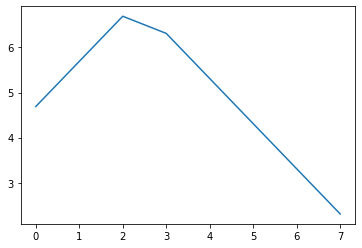

In [145]:
x = [0,1,2,3,4,5,6,7]
y = []
for i in x:
  Y = -abs(i-a1) + b
  y.append(Y)
plt.plot(x,y)
plt.show()

### 2) 예제 데이터 일반함수에 적용

- (인풋이) 30일동안 수익내고 싶은 고객이 360일 통계를 보고 싶다.
- (인풋이) 가격폭이 중상의 주식(암호화폐)를 추천 받고싶다

In [146]:
# input의 예
input_n = 30
input_bounds = 360
input_amplitude_level = a3

In [147]:
input_amplitude_level

7

In [148]:
#함수 정의
def y(x,a):
  Y = -abs(x-a) + len(stocks)
  return Y

In [149]:
out_DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test/MA{0}_bounds{1}_.csv'.format(input_n,input_bounds))

In [150]:
#여기서 z_value_rank 가 함수의 x 값 그리고 높은 y 값으로 고객한테 추천
out_DF

,stocks,MA,bounds,z_value,z_value_rank
0,AAPL,MA30,bounds360,1.389121,7.0
1,BABA,MA30,bounds360,1.364881,5.0
2,C,MA30,bounds360,1.329591,2.0
3,INTC,MA30,bounds360,1.346423,4.0
4,MSFT,MA30,bounds360,1.387447,6.0
5,UGL,MA30,bounds360,1.323537,1.0
6,WFC,MA30,bounds360,1.335123,3.0


In [151]:
for i in out_DF['z_value_rank']:
  print(y(i,input_amplitude_level))

7.0
5.0
2.0
4.0
6.0
1.0
3.0


### 3) 최종 점수판 정의


In [152]:
coustomer_finalscore = {}

In [153]:
for j,i in zip(out_DF['stocks'],out_DF['z_value_rank']):
  print(j,y(i,input_amplitude_level))
  coustomer_finalscore[j] = y(i,input_amplitude_level)

AAPL 7.0
BABA 5.0
C 2.0
INTC 4.0
MSFT 6.0
UGL 1.0
WFC 3.0


In [154]:
coustomer_finalscore

{'AAPL': 7.0,
 'BABA': 5.0,
 'C': 2.0,
 'INTC': 4.0,
 'MSFT': 6.0,
 'UGL': 1.0,
 'WFC': 3.0}

## VII. 최종 점수판 기준 output하기

In [155]:
out_put = max(coustomer_finalscore,key=coustomer_finalscore.get)
print(out_put)

AAPL


### ---초본 완성---